In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import seaborn as sns 
# Surpass Warnings
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

data = pd.read_csv("diabetes_health_indicators.csv")



In [110]:
# Summarize the data
data.sample(10)

Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
966              0       1         0          1   34       0       0   
1605             0       0         1          1   25       1       0   
1866             0       1         1          1   36       1       0   
1364             0       1         1          1   30       0       0   
1991             0       0         0          1   22       0       0   
2059             0       0         1          1   30       0       0   
2055             2       1         1          1   28       1       0   
816              0       1         0          1   44       0       0   
1611             0       1         1          1   34       1       1   
2290             0       1         0          1   38       1       0   

      HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
966                      0             1       1  ...            0        2   
1605                     0             0       0  ...            1        4   
1866                     0             1       1  ...            0        3   
1364                     1             1       1  ...            0        3   
1991                     0             1       0  ...            0        1   
2059                     0             0       1  ...            0        1   
2055                     0             0       0  ...            0        3   
816                      0             0       1  ...            0        5   
1611                     1             0       0  ...            1        5   
2290                     0             1       1  ...            0        2   

      MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Fastingsugar  
966          0         0         1    0    9          4       7            76  
1605        14         2         0    0    6          4       6            73  
1866         0         0         0    1   11          4       7            76  
1364         0         0         0    1    9          5       7            82  
1991         0         0         0    0    8          6       8            88  
2059         0         0         0    0    8          5       8            87  
2055         0         0         0    0    9          4       6           182  
816          0        20         1    0    8          4       3            84  
1611         7        30         1    0    8          3       2            94  
2290         0         0         0    0    7          6       7            86  

[10 rows x 23 columns]

The data contains 2500 observations of 22 attributes/features based on diabetes disease research regarding factors influencing diabetes disease

The risk factors of Diabetes are high blood pressure, high cholesterol, smoking, obesity, age, sex, diet, exercise, alcohol consumption, BMI, Household Income, Sleep , Time since last checkup, Education, Health care coverage and Mental Health


In [111]:
# Statistical values for each attribute
data.describe()

Diabetes_012       HighBP     HighChol    CholCheck          BMI  \
count   2499.000000  2499.000000  2499.000000  2499.000000  2499.000000   
mean       0.438976     0.559024     0.505802     0.978792    29.188475   
std        0.817504     0.496603     0.500066     0.144108     6.500731   
min        0.000000     0.000000     0.000000     0.000000    14.000000   
25%        0.000000     0.000000     0.000000     1.000000    25.000000   
50%        0.000000     1.000000     1.000000     1.000000    28.000000   
75%        0.000000     1.000000     1.000000     1.000000    32.000000   
max        2.000000     1.000000     1.000000     1.000000    63.000000   

            Smoker       Stroke  HeartDiseaseorAttack  PhysActivity  \
count  2499.000000  2499.000000           2499.000000   2499.000000   
mean      0.438175     0.060024              0.122449      0.659064   
std       0.496262     0.237579              0.327869      0.474119   
min       0.000000     0.000000              0.000000      0.000000   
25%       0.000000     0.000000              0.000000      0.000000   
50%       0.000000     0.000000              0.000000      1.000000   
75%       1.000000     0.000000              0.000000      1.000000   
max       1.000000     1.000000              1.000000      1.000000   

            Fruits  ...  NoDocbcCost      GenHlth     MentHlth     PhysHlth  \
count  2499.000000  ...  2499.000000  2499.000000  2499.000000  2499.000000   
mean      0.570628  ...     0.109644     2.808723     3.969588     5.535414   
std       0.495086  ...     0.312508     1.128382     8.298998     9.874505   
min       0.000000  ...     0.000000     1.000000     0.000000     0.000000   
25%       0.000000  ...     0.000000     2.000000     0.000000     0.000000   
50%       1.000000  ...     0.000000     3.000000     0.000000     0.000000   
75%       1.000000  ...     0.000000     4.000000     3.000000     5.000000   
max       1.000000  ...     1.000000     5.000000    30.000000    30.000000   

          DiffWalk          Sex          Age    Education       Income  \
count  2499.000000  2499.000000  2499.000000  2499.000000  2499.000000   
mean      0.265306     0.366947     8.573830     4.801521     5.480992   
std       0.441584     0.482068     2.862972     1.040330     2.190840   
min       0.000000     0.000000     1.000000     1.000000     1.000000   
25%       0.000000     0.000000     7.000000     4.000000     4.000000   
50%       0.000000     0.000000     9.000000     5.000000     6.000000   
75%       1.000000     1.000000    11.000000     6.000000     7.000000   
max       1.000000     1.000000    13.000000     6.000000     8.000000   

       Fastingsugar  
count   2499.000000  
mean     100.108043  
std       33.444365  
min       70.000000  
25%       78.000000  
50%       88.000000  
75%       98.000000  
max      199.000000  

[8 rows x 23 columns]

In [112]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Fastingsugar            0
dtype: int64

In [113]:
data.shape

(2499, 23)

In [33]:
conda install -c conda-forge pandas-profiling=2.6.0

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pandas-profiling=2.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    confuse-2.0.0              |     pyhd8ed1ab_0          24 KB  conda-forge
    htmlmin-0.1.12             |             py_1          21 KB  conda-forge
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    multimethod-1.4            |             py_0          10 KB  conda-forge
    pandas-profiling-2.6.0     |             py_0         163 KB  conda-forge
    phik-0.12.2                |   py39hc6639ae_0      



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          2499 non-null   int64
 1   HighBP                2499 non-null   int64
 2   HighChol              2499 non-null   int64
 3   CholCheck             2499 non-null   int64
 4   BMI                   2499 non-null   int64
 5   Smoker                2499 non-null   int64
 6   Stroke                2499 non-null   int64
 7   HeartDiseaseorAttack  2499 non-null   int64
 8   PhysActivity          2499 non-null   int64
 9   Fruits                2499 non-null   int64
 10  Veggies               2499 non-null   int64
 11  HvyAlcoholConsump     2499 non-null   int64
 12  AnyHealthcare         2499 non-null   int64
 13  NoDocbcCost           2499 non-null   int64
 14  GenHlth               2499 non-null   int64
 15  MentHlth              2499 non-null   int64
 16  PhysHl

In [115]:
# Compute Pearson Correlation Coefficient
data.corr()

Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.253175  0.183250   0.072262  0.247169   
HighBP                    0.253175  1.000000  0.245662   0.087422  0.237678   
HighChol                  0.183250  0.245662  1.000000   0.054482  0.068194   
CholCheck                 0.072262  0.087422  0.054482   1.000000  0.019225   
BMI                       0.247169  0.237678  0.068194   0.019225  1.000000   
Smoker                    0.044721  0.032275  0.106703  -0.004348 -0.052661   
Stroke                    0.134292  0.115861  0.084676   0.025505  0.007187   
HeartDiseaseorAttack      0.150360  0.184248  0.188553   0.038041  0.042697   
PhysActivity             -0.146655 -0.120227 -0.113223   0.052324 -0.144616   
Fruits                   -0.030641 -0.027953 -0.044101   0.040642 -0.035794   
Veggies                  -0.061036 -0.036659 -0.010544  -0.003081 -0.019911   
HvyAlcoholConsump        -0.050494 -0.019865 -0.018838  -0.013186 -0.072151   
AnyHealthcare             0.010588  0.025672  0.044593   0.168270 -0.009549   
NoDocbcCost               0.034035  0.020191 -0.001511  -0.108349  0.117909   
GenHlth                   0.278970  0.330205  0.238216   0.021818  0.236694   
MentHlth                  0.057434  0.062893  0.097179  -0.044054  0.109451   
PhysHlth                  0.143549  0.163356  0.130300   0.009390  0.122537   
DiffWalk                  0.239484  0.245289  0.157091   0.019258  0.238193   
Sex                       0.002498  0.002300  0.033510   0.008345  0.005514   
Age                       0.191995  0.290115  0.245134   0.099371 -0.097336   
Education                -0.106034 -0.158634 -0.079352   0.003954 -0.054252   
Income                   -0.165770 -0.188738 -0.090610   0.036128 -0.098338   
Fastingsugar              0.918254  0.228982  0.165745   0.055794  0.220266   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes_012          0.044721  0.134292              0.150360     -0.146655   
HighBP                0.032275  0.115861              0.184248     -0.120227   
HighChol              0.106703  0.084676              0.188553     -0.113223   
CholCheck            -0.004348  0.025505              0.038041      0.052324   
BMI                  -0.052661  0.007187              0.042697     -0.144616   
Smoker                1.000000  0.048465              0.100673     -0.062399   
Stroke                0.048465  1.000000              0.239657     -0.077688   
HeartDiseaseorAttack  0.100673  0.239657              1.000000     -0.097019   
PhysActivity         -0.062399 -0.077688             -0.097019      1.000000   
Fruits               -0.097497  0.008188             -0.001510      0.124797   
Veggies               0.006934 -0.038547             -0.046046      0.110511   
HvyAlcoholConsump     0.104118 -0.016337             -0.006289      0.010489   
AnyHealthcare        -0.034341 -0.002891              0.036411      0.021913   
NoDocbcCost           0.046308  0.089254              0.064267     -0.069122   
GenHlth               0.146158  0.195160              0.264596     -0.279084   
MentHlth              0.085469  0.051076              0.067427     -0.130728   
PhysHlth              0.081179  0.144480              0.202063     -0.217602   
DiffWalk              0.064831  0.164858              0.223456     -0.250405   
Sex                   0.154272 -0.035100              0.022071      0.062421   
Age                   0.061327  0.101187              0.192513     -0.068450   
Education            -0.102868 -0.082973             -0.080119      0.133020   
Income               -0.046646 -0.137785             -0.151690      0.128263   
Fastingsugar          0.039453  0.120655              0.144787     -0.124337   

                        Fruits  ...  NoDocbcCost   GenHlth  MentHlth  \
Diabetes_012         -0.030641  ...     0.034035  0.278970  0.057434   
HighBP               -0.027953  ...     0.020191  0.330205  

In [116]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  
data["Diabetes_binary_str"]= data["Diabetes_012"].replace({0:"Non-Diabetic",1:"Pre-Diabetic",2:"Diabetic"})
data2 = data.copy() 

In [117]:
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Prediabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'


# data2.Fastingsugar[(121 < (data2['Fastingsugar']) < 201)] = 'High Sugar'
data2.Fastingsugar[(data2['Fastingsugar'] > 121) & (data2['Fastingsugar'] < 201)] = -1
data2.Fastingsugar[(data2['Fastingsugar'] > 69) & (data2['Fastingsugar'] < 100)] = 0
data2.Fastingsugar[(data2['Fastingsugar'] > 101) & (data2['Fastingsugar'] < 121)] = 1
# data2.Fastingsugar[(data2['Fastingsugar'] < 201)] = 'High Sugar'
# data2.Fastingsugar[(data2['Fastingsugar'] < 201)] = 'High Sugar'
# data2.Fastingsugar[pd.to_numeric(data2['Fastingsugar']) in range(70,99)] = 'Normal'
# data2.Fastingsugar[pd.to_numeric(data2['Fastingsugar']) in range(100,120)] = 'Borderline'


In [118]:
data2.sample(10)

Diabetes_012   HighBP             HighChol                     CholCheck  \
1828  No Diabetes  High BP     High Cholesterol  Cholesterol Check in 5 Years   
550   No Diabetes  High BP     High Cholesterol  Cholesterol Check in 5 Years   
1190     Diabetes  No High     High Cholesterol  Cholesterol Check in 5 Years   
2018  No Diabetes  No High     High Cholesterol  Cholesterol Check in 5 Years   
2003  No Diabetes  High BP  No High Cholesterol  Cholesterol Check in 5 Years   
1807  No Diabetes  High BP  No High Cholesterol  Cholesterol Check in 5 Years   
2029     Diabetes  No High     High Cholesterol  Cholesterol Check in 5 Years   
1019  No Diabetes  No High  No High Cholesterol  Cholesterol Check in 5 Years   
1093  No Diabetes  No High  No High Cholesterol  Cholesterol Check in 5 Years   
586   No Diabetes  No High  No High Cholesterol  Cholesterol Check in 5 Years   

      BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits  ... GenHlth  \
1828   37     No     No                   No          Yes     No  ...    Fair   
550    26    Yes     No                   No          Yes    Yes  ...    Good   
1190   32    Yes     No                   No          Yes    Yes  ...    Good   
2018   30     No     No                   No          Yes     No  ...    Good   
2003   29     No     No                   No          Yes    Yes  ...    Fair   
1807   24     No     No                   No          Yes    Yes  ...    Fair   
2029   22    Yes     No                   No           No     No  ...    Good   
1019   28     No     No                   No          Yes    Yes  ...    Poor   
1093   21     No     No                   No          Yes    Yes  ...    Fair   
586    27    Yes     No                   No          Yes     No  ...    Good   

     MentHlth PhysHlth DiffWalk     Sex          Age             Education  \
1828        0        0       No  Female     55 to 59              Magister   
550         0        0       No  Female     55 to 59              Magister   
1190        0        0       No  Female     60 to 64    Senior High School   
2018        0        0       No    Male     50 to 54              Magister   
2003        2        1       No    Male     40 to 44              Magister   
1807        0        0      Yes  Female  80 or older            Elementary   
2029        7        3       No    Male     40 to 44              Magister   
1019        0        4       No    Male     40 to 44              Magister   
1093        0        0       No    Male     65 to 69  Undergraduate Degree   
586         0        0       No    Male     65 to 69              Magister   

                 Income Fastingsugar Diabetes_binary_str  
1828    $75,000 or More            0        Non-Diabetic  
550     $75,000 or More            0        Non-Diabetic  
1190  Less Than $35,000           -1            Diabetic  
2018    $75,000 or More            0        Non-Diabetic  
2003    $75,000 or More            0        Non-Diabetic  
1807  Less Than $10,000            0        Non-Diabetic  
2029  Less Than $10,000           -1            Diabetic  
1019    $75,000 or More            0        Non-Diabetic  
1093  Less Than $10,000            0        Non-Diabetic  
586     $75,000 or More            0        Non-Diabetic  

[10 rows x 24 columns]

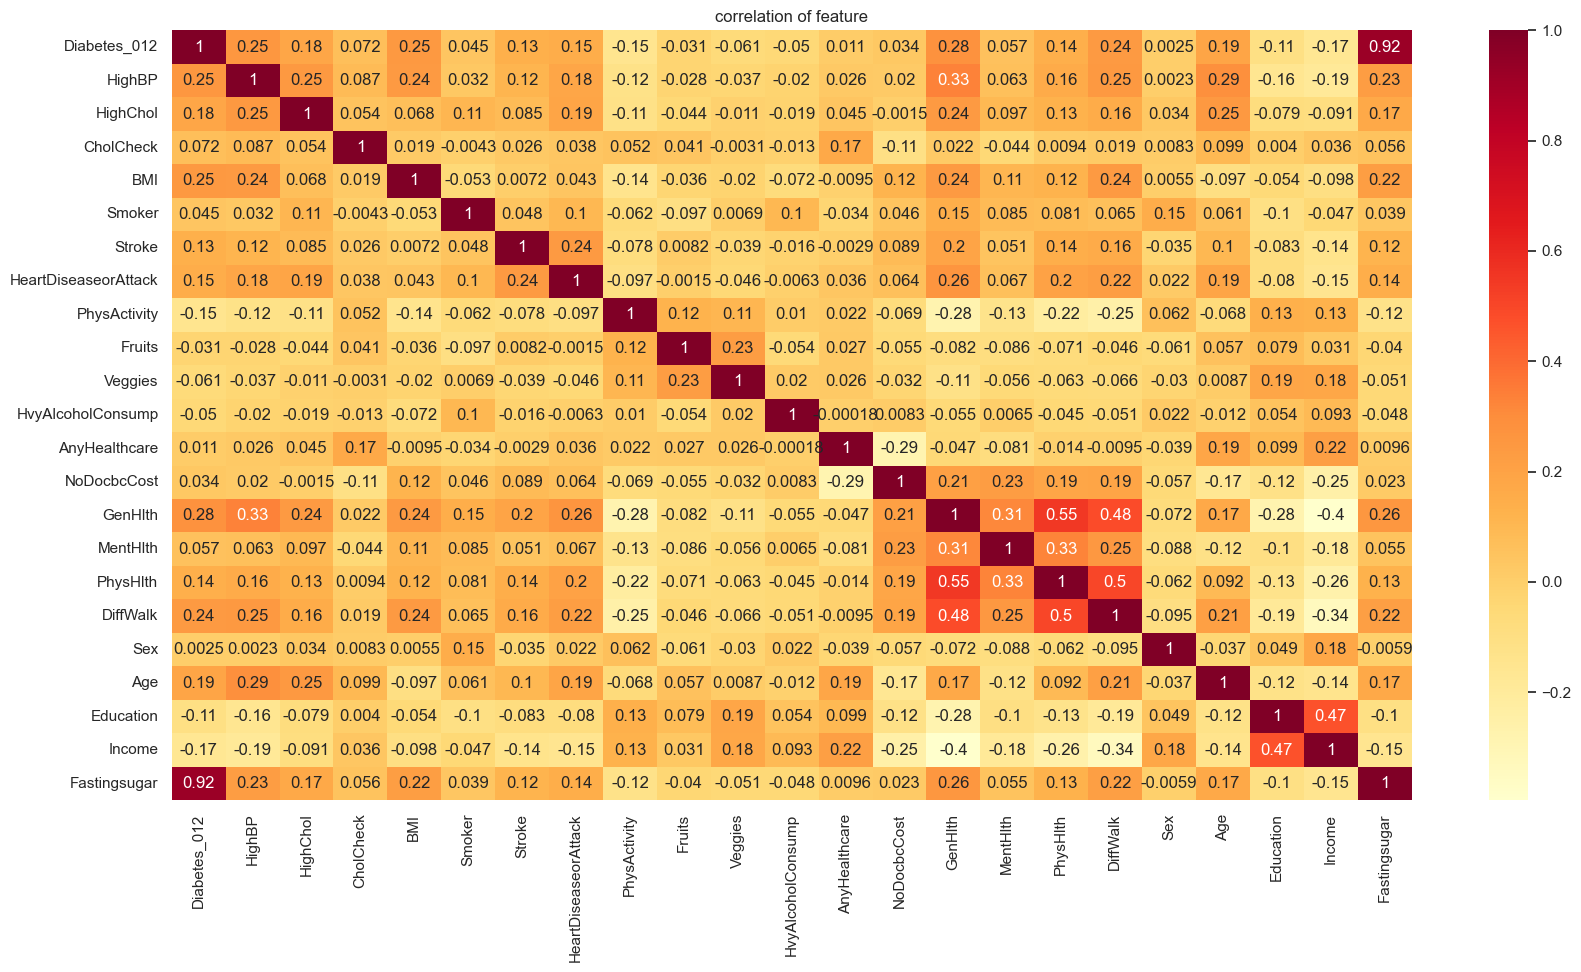

In [119]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

From the Pearson Correlation Coefficient (PCC), we can see the correlation between each attribute and the target label 'Diabetes_01'. The PCC ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

Some of the attributes, such as (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (GenHlth, DiffWalk) are highly correleted with each other.Fruits, AnyHealthcare, NoDocbccost and sex are least correlated with Diabetes_binary. Where as HighBP, HighChol, BMI, smoker, stroke, HeartDiseaseorAttack, PhysActivity, Veggies, MentHlth, HvyAlcoholconsump, GenHlth, PhysHlth, Age, Education, Income and DiffWalk have a significant correlation with target, 'Diabetes_01'.


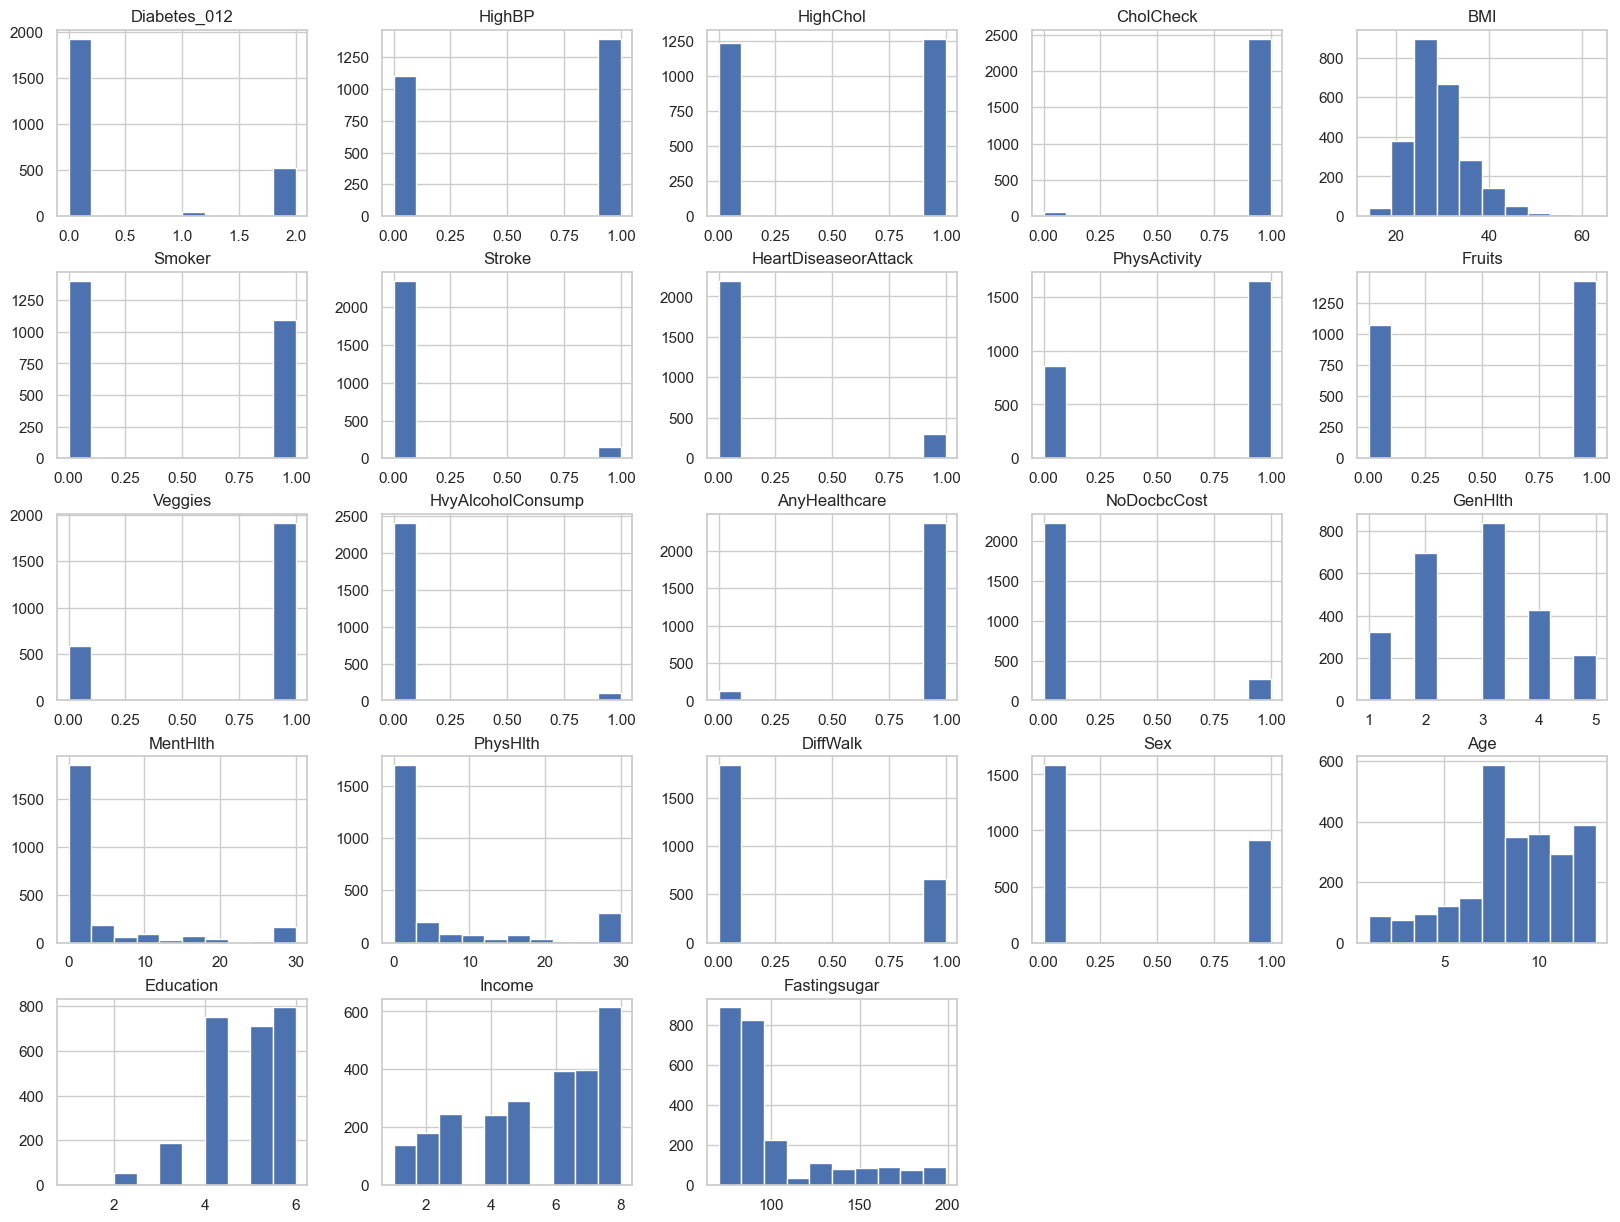

In [120]:
data.hist(figsize=(20,15));

Visualization Of Yes-No Columns and their relation with the target

In [121]:
column = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
          'DiffWalk','Fastingsugar']

In [122]:
def create_plot_pivot(data2, x_column):
    _df_plot = data2.groupby([x_column, 'Diabetes_012']).size() \
    .reset_index().pivot(columns='Diabetes_012', index=x_column, values=0)
    return _df_plot

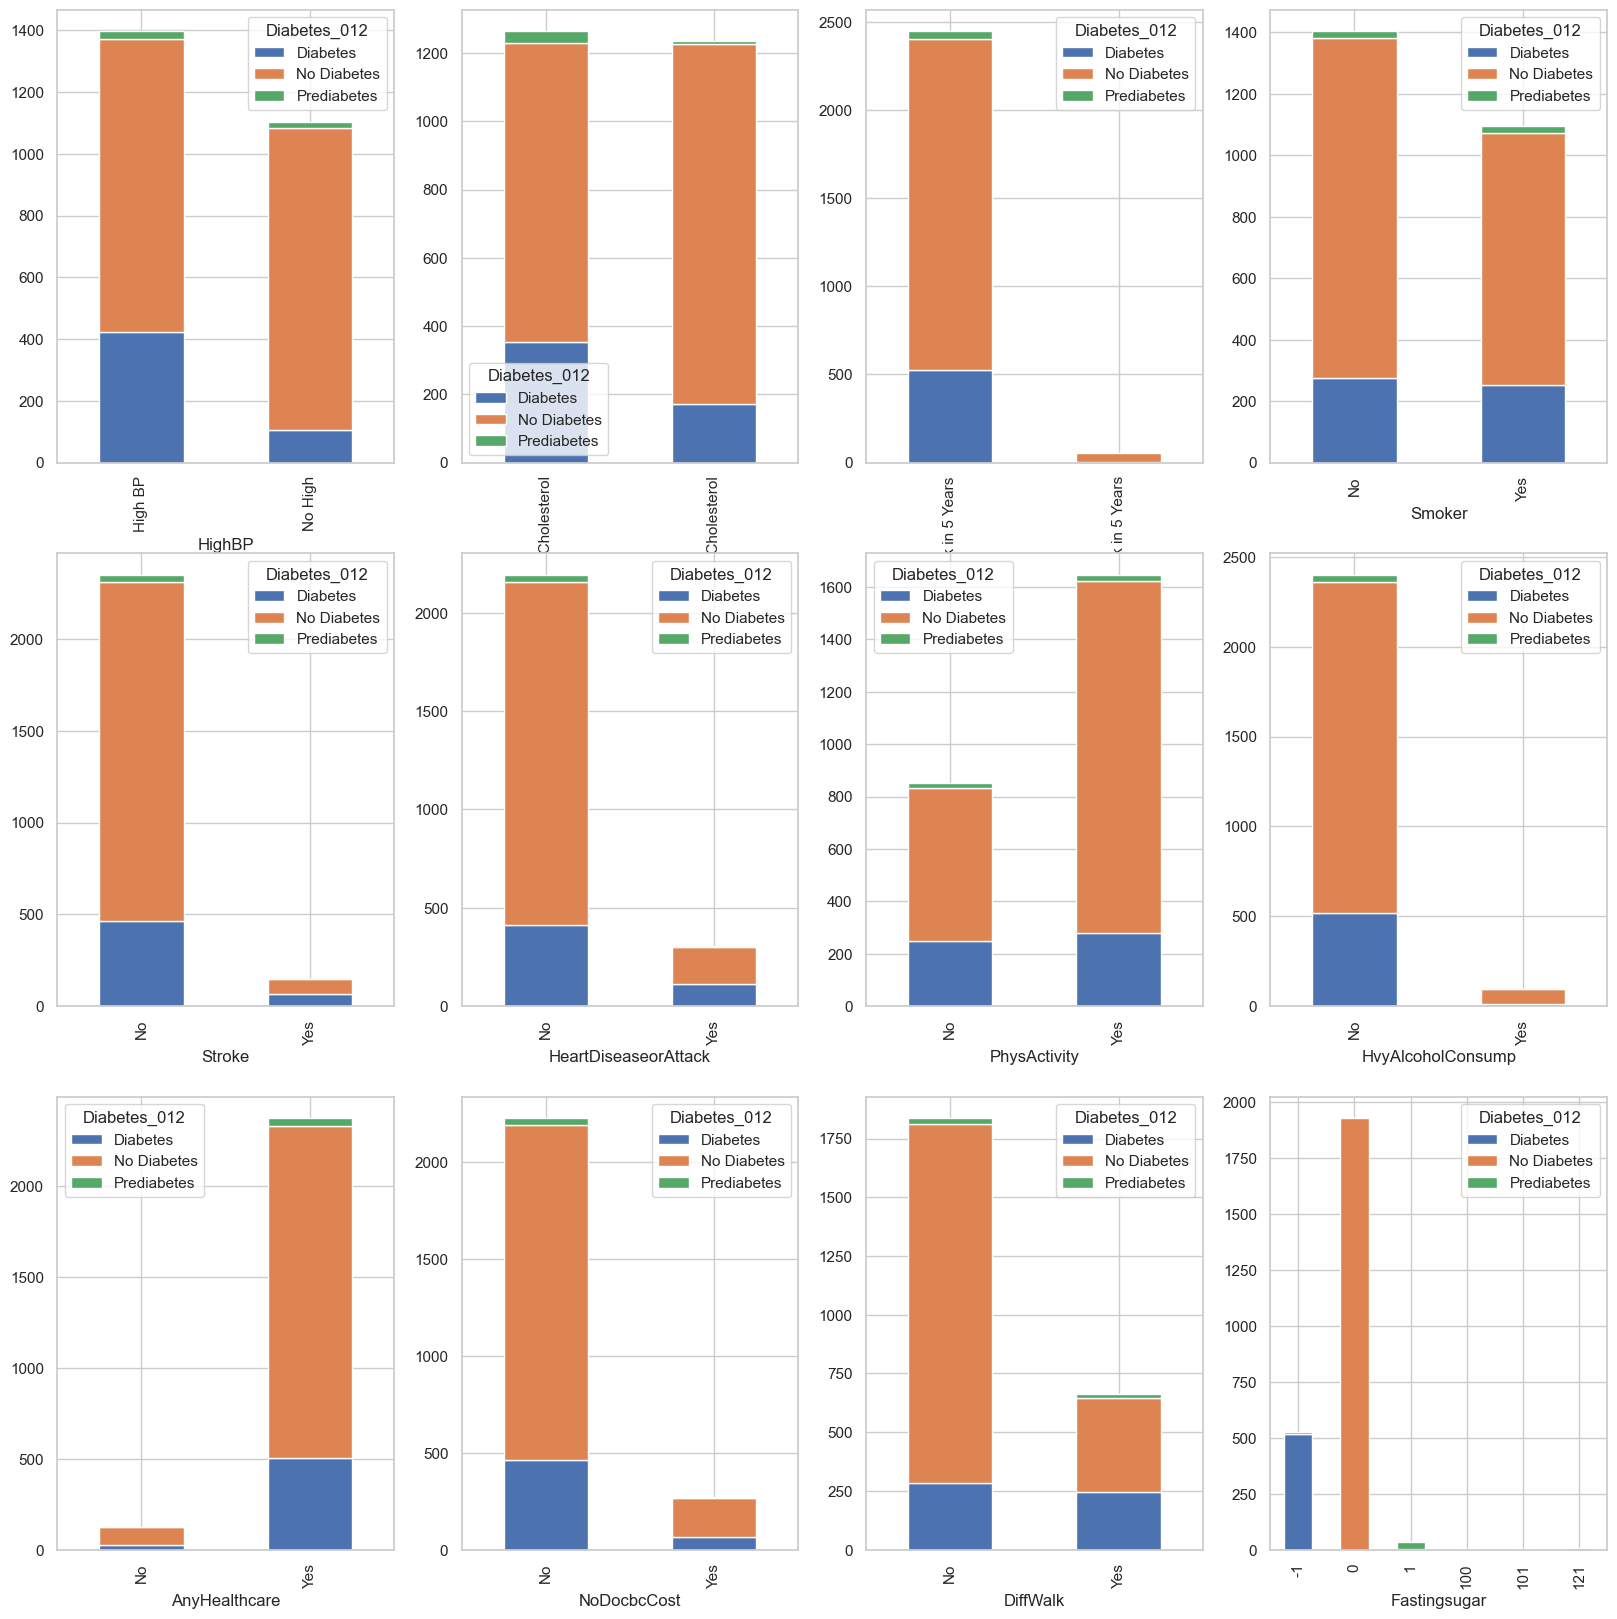

In [123]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(column)

for i in range(c):
    create_plot_pivot(data2, column[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(column[i])
    
fig.show()

In [124]:
data2["Diabetes_012"].value_counts()

No Diabetes    1929
Diabetes        527
Prediabetes      43
Name: Diabetes_012, dtype: int64

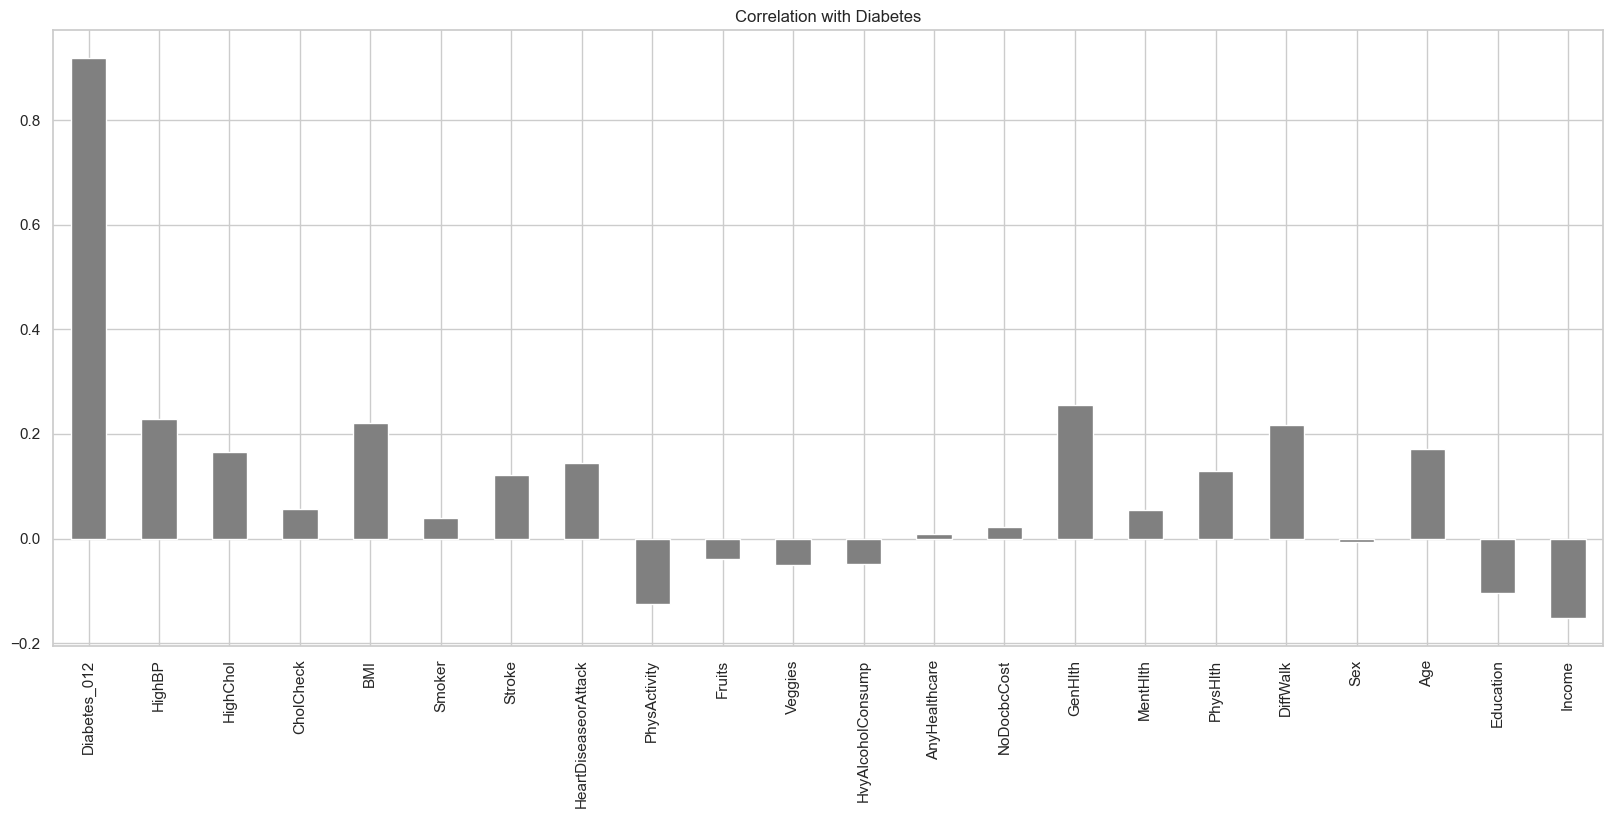

In [125]:
data.drop('Fastingsugar', axis=1).corrwith(data.Fastingsugar).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes",color="Grey");

In [126]:
# Drop attributes that are not required
new_data = data.drop(['Fruits', 'Veggies', 'Sex', 'CholCheck', 'AnyHealthcare','Diabetes_binary_str'], axis=1)

# Lets fill all the NaN with the mean values
new_data.sample(10)

Diabetes_012  HighBP  HighChol  BMI  Smoker  Stroke  \
2011             0       0         0   29       0       0   
1383             0       1         1   28       1       1   
654              0       0         0   25       0       0   
379              0       1         1   26       0       0   
61               0       1         0   27       1       0   
989              0       1         0   32       0       0   
1919             0       1         1   31       1       0   
16               0       1         1   21       0       0   
1924             0       1         0   33       1       0   
608              0       0         0   26       0       0   

      HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  NoDocbcCost  \
2011                     0             1                  0            0   
1383                     1             0                  0            0   
654                      0             0                  0            1   
379                      0             0                  0            1   
61                       0             0                  0            0   
989                      0             0                  0            0   
1919                     0             0                  0            0   
16                       0             1                  0            0   
1924                     0             1                  0            0   
608                      0             1                  0            0   

      GenHlth  MentHlth  PhysHlth  DiffWalk  Age  Education  Income  \
2011        3         0         0         0    8          4       6   
1383        4         0        30         0   13          4       2   
654         4        20        30         1    7          6       1   
379         5        25        30         1    7          5       2   
61          4         0         5         1   11          4       2   
989         4         3        20         1   10          6       3   
1919        2         0         1         0    8          4       8   
16          3         0         0         0   10          4       3   
1924        2         0         0         0    6          5       8   
608         2         0         0         0    8          6       8   

      Fastingsugar  
2011            98  
1383            75  
654             86  
379             94  
61              91  
989             70  
1919            94  
16              75  
1924            77  
608             83

In [127]:
# Split the data into training and test sets
X = new_data.drop('Fastingsugar', axis=1)
y = new_data['Fastingsugar']

# Import train_test_split module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

To verify that the test portion of the data is representative of the entire dataset, we can compare the mean and standard deviation of the attributes in both the training and testing sets. If they are similar, then we can conclude that the test set is representative of the entire dataset.

# Training set Statistics

In [128]:
pd.DataFrame(X_train.mean(axis=0),columns = ['Mean'])

Mean
Diabetes_012           0.422527
HighBP                 0.554603
HighChol               0.507719
BMI                   29.129217
Smoker                 0.424814
Stroke                 0.062321
HeartDiseaseorAttack   0.121212
PhysActivity           0.662664
HvyAlcoholConsump      0.044597
NoDocbcCost            0.108634
GenHlth                2.800457
MentHlth               3.860492
PhysHlth               5.420812
DiffWalk               0.260149
Age                    8.536878
Education              4.810177
Income                 5.519726

In [129]:
pd.DataFrame(X_train.std(axis=0),columns = ['Standard deviation'])

Standard deviation
Diabetes_012                    0.804291
HighBP                          0.497152
HighChol                        0.500083
BMI                             6.371903
Smoker                          0.494456
Stroke                          0.241807
HeartDiseaseorAttack            0.326467
PhysActivity                    0.472936
HvyAlcoholConsump               0.206476
NoDocbcCost                     0.311268
GenHlth                         1.122721
MentHlth                        8.150612
PhysHlth                        9.774057
DiffWalk                        0.438841
Age                             2.843040
Education                       1.041194
Income                          2.188822

In [130]:
pd.DataFrame(X_test.mean(axis=0),columns = ['Mean'])

Mean
Diabetes_012           0.477333
HighBP                 0.569333
HighChol               0.501333
BMI                   29.326667
Smoker                 0.469333
Stroke                 0.054667
HeartDiseaseorAttack   0.125333
PhysActivity           0.650667
HvyAlcoholConsump      0.026667
NoDocbcCost            0.112000
GenHlth                2.828000
MentHlth               4.224000
PhysHlth               5.802667
DiffWalk               0.277333
Age                    8.660000
Education              4.781333
Income                 5.390667

In [131]:
pd.DataFrame(X_test.std(axis=0),columns = ['Standard deviation'])

Standard deviation
Diabetes_012                    0.846823
HighBP                          0.495500
HighChol                        0.500332
BMI                             6.794029
Smoker                          0.499392
Stroke                          0.227480
HeartDiseaseorAttack            0.331317
PhysActivity                    0.477078
HvyAlcoholConsump               0.161215
NoDocbcCost                     0.315577
GenHlth                         1.141996
MentHlth                        8.635349
PhysHlth                       10.106429
DiffWalk                        0.447981
Age                             2.909012
Education                       1.038728
Income                          2.194341

In [132]:
def plot_model(x, y,model_name):
    sns.set(style='whitegrid')
    plt.scatter(x,y)
    plt.title(model_name,fontsize = 14)
    plt.xlabel("Actual Values",fontsize=12)
    plt.ylabel("Predicted Values",fontsize=12)

In [133]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)


Train a linear regression model using the closed form solution (normal equation)

In [134]:
best_model={'Name':[],'MSE':[], 'MAE':[], 'R2 score':[]}

In [135]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
# Performing Linear Regression
reg = LinearRegression().fit(X_train, y_train)
# Testing model with test data
reg_y_pred = reg.predict(X_test)

print('Linear Regression (Closed Form) R2 score:', reg.score(X_test, y_test))
df = pd.DataFrame( data = reg.coef_, columns = ['Coefficient'] ,index = X.columns)
df

Linear Regression (Closed Form) R2 score: 0.8400561031496399


Coefficient
Diabetes_012            30.596262
HighBP                  -0.070047
HighChol                 0.072750
BMI                     -0.206415
Smoker                  -0.006390
Stroke                  -0.189998
HeartDiseaseorAttack     0.129198
PhysActivity             0.712483
HvyAlcoholConsump       -0.255144
NoDocbcCost             -0.491731
GenHlth                  0.281141
MentHlth                 0.166239
PhysHlth                 0.130002
DiffWalk                 0.195152
Age                     -0.830711
Education               -0.364312
Income                  -0.057768

MAE: 10.458896836452519
MSE: 184.02231342670459
RMSE: 13.565482425137139


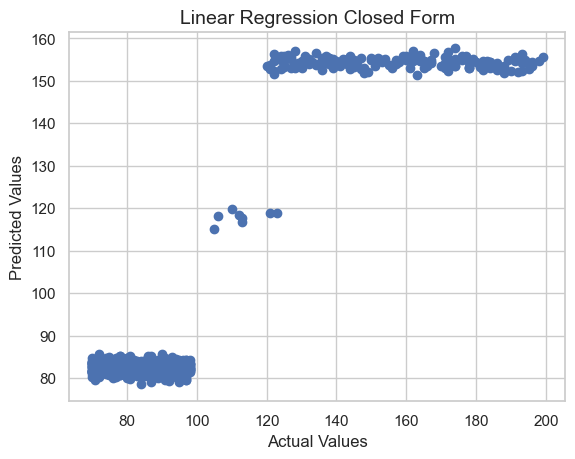

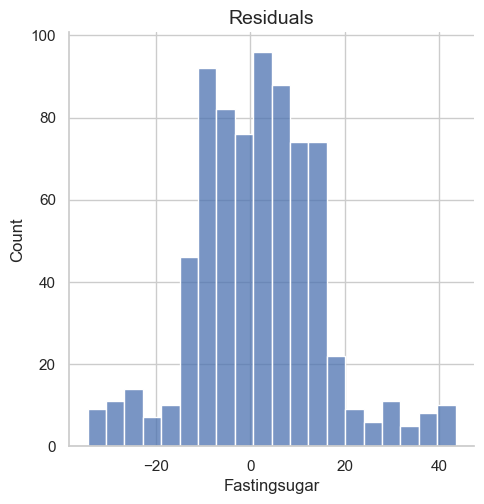

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, reg_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_y_pred)))

best_model['Name'].append('Linear Regression')
best_model['MSE'].append(metrics.mean_squared_error(y_test, reg_y_pred))
best_model['MAE'].append(metrics.mean_absolute_error(y_test, reg_y_pred))
best_model['R2 score'].append(np.sqrt(metrics.mean_squared_error(y_test, reg_y_pred)))

plot_model(y_test,reg_y_pred,'Linear Regression Closed Form')
plt.show()

# Plotting Residuals
sns.displot((y_test - reg_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

In [137]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X_train, y_train, cv=4)
print("Closed form solution - Cross validation scores:", scores)
print("Closed form solution - Mean cross-validation score:", np.mean(scores))

Closed form solution - Cross validation scores: [0.80537001 0.85608862 0.82560381 0.85019868]
Closed form solution - Mean cross-validation score: 0.8343152795250205


Learning Curve for Closed form Linear Regression

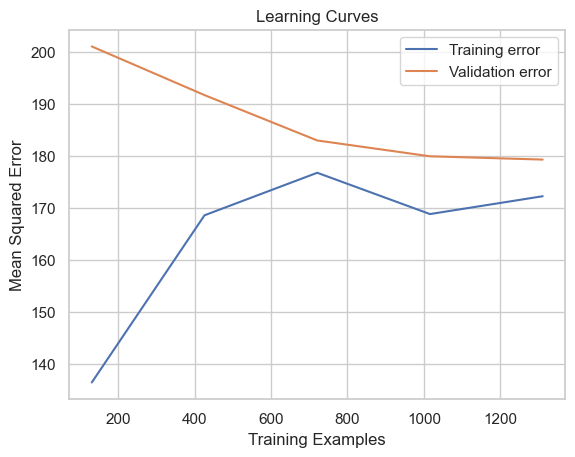

In [138]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

Train a linear regression model using SGD (Stochastic Gradient Descent)

In [139]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor().fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

print('Linear Regression (SGD) R2 score:', sgd.score(X_test, y_test))
df = pd.DataFrame( data = sgd.coef_, columns = ['Coefficient'] ,index = X.columns)
df

Linear Regression (SGD) R2 score: 0.8394909406700315


Coefficient
Diabetes_012            30.607173
HighBP                  -0.023774
HighChol                 0.118159
BMI                     -0.143009
Smoker                   0.129487
Stroke                  -0.149673
HeartDiseaseorAttack     0.234826
PhysActivity             0.635572
HvyAlcoholConsump       -0.329225
NoDocbcCost             -0.334631
GenHlth                  0.330843
MentHlth                 0.336246
PhysHlth                 0.233170
DiffWalk                 0.324653
Age                     -0.850000
Education               -0.258995
Income                   0.045189

MAE: 10.49110946467079
MSE: 184.6725570996895
RMSE: 13.589428137331222


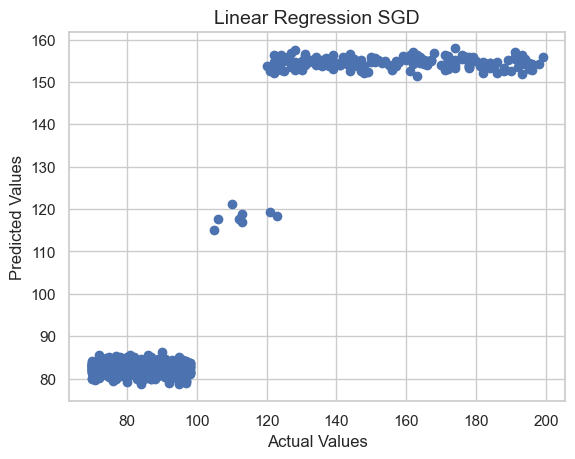

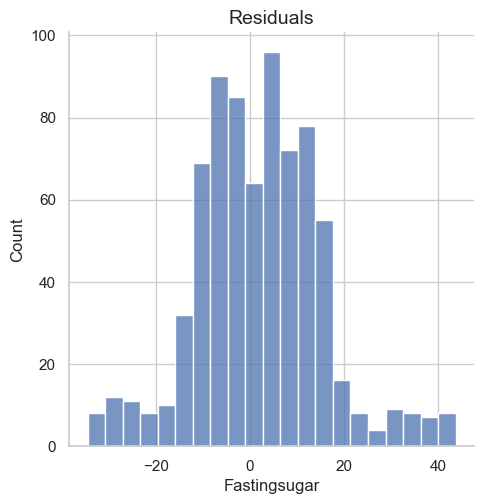

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, sgd_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, sgd_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, sgd_y_pred)))

best_model['Name'].append('SGD')
best_model['MAE'].append(metrics.mean_absolute_error(y_test, sgd_y_pred))
best_model['MSE'].append(metrics.mean_squared_error(y_test, sgd_y_pred))
best_model['R2 score'].append(sgd.score(X_test, y_test))

plot_model(y_test,sgd_y_pred,'Linear Regression SGD')
plt.show()

# Plotting Residuals
sns.displot((y_test - sgd_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

4-fold cross validation on SGD Regressor (Stochastic Gradient Descent)

In [141]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X_train, y_train, cv=4)
print("SGD - Cross validation scores:", scores)
print("SGD - Mean cross-validation score:", np.mean(scores))

SGD - Cross validation scores: [0.80649814 0.85666003 0.82780129 0.84915571]
SGD - Mean cross-validation score: 0.8350287927797002


Learning curve for SGD Regressor

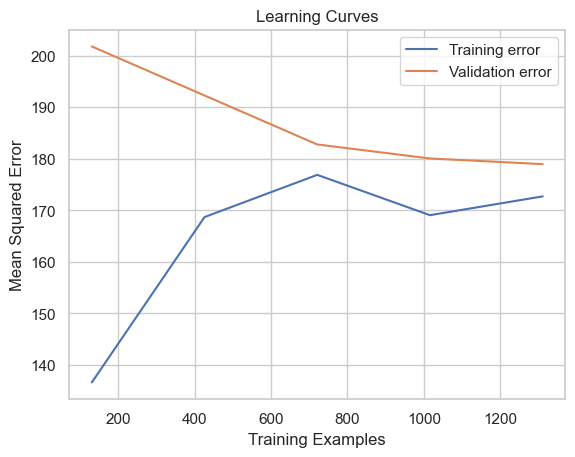

In [142]:
train_sizes, train_scores, test_scores = learning_curve(sgd, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

# Perform Ridge regularization

Ridge regularization works by adding a penalty term to the cost function that the model is trying to minimize. The penalty term is proportional to the sum of the squares of the model coefficients, which encourages the model to have smaller coefficients. This reduces the variance of the model and helps to prevent overfitting.

In [143]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5,fit_intercept=True).fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

print('Ridge Regression R2 score:', ridge.score(X_test, y_test))
df = pd.DataFrame( data = ridge.coef_, columns = ['Coefficient'] ,index = X.columns)
df

Ridge Regression R2 score: 0.8400467519225108


Coefficient
Diabetes_012            30.585654
HighBP                  -0.068936
HighChol                 0.073680
BMI                     -0.204437
Smoker                  -0.006274
Stroke                  -0.189261
HeartDiseaseorAttack     0.129601
PhysActivity             0.711830
HvyAlcoholConsump       -0.255342
NoDocbcCost             -0.491419
GenHlth                  0.282244
MentHlth                 0.166054
PhysHlth                 0.129481
DiffWalk                 0.195642
Age                     -0.829261
Education               -0.363941
Income                  -0.058162

MAE: 10.458655889528584
MSE: 184.0330724145969
RMSE: 13.565878976852067


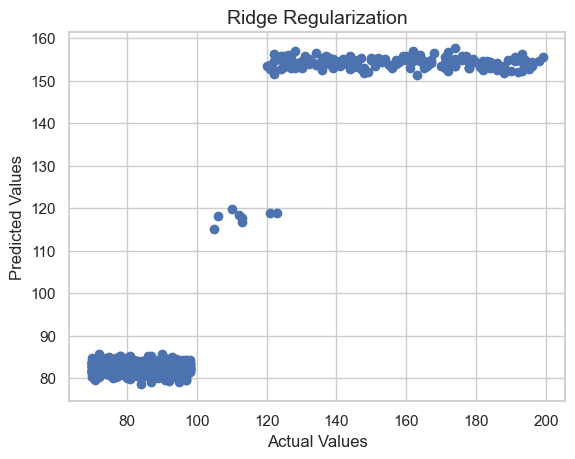

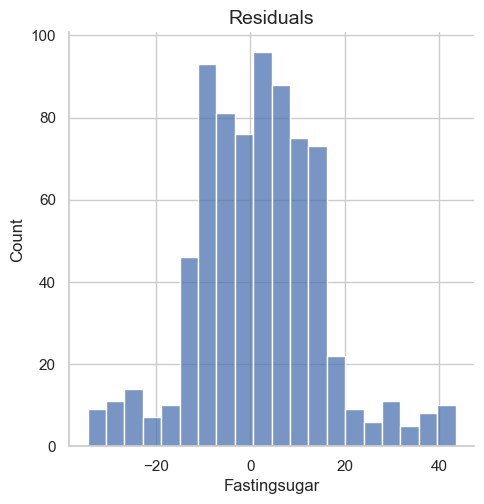

In [144]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_y_pred)))

best_model['Name'].append('Ridge Regularization')
best_model['MAE'].append(metrics.mean_absolute_error(y_test, ridge_y_pred))
best_model['MSE'].append(metrics.mean_squared_error(y_test, ridge_y_pred))
best_model['R2 score'].append(np.sqrt(metrics.mean_squared_error(y_test, ridge_y_pred)))

plot_model(y_test,ridge_y_pred,'Ridge Regularization')

# Plotting Residuals
sns.displot((y_test - ridge_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

Validation curve for Ridge Regularization

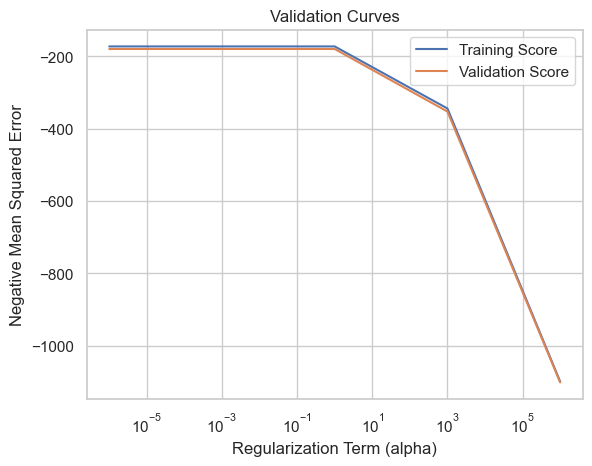

In [145]:
from sklearn.model_selection import validation_curve

# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

Learning Curve for Ridge Regularization

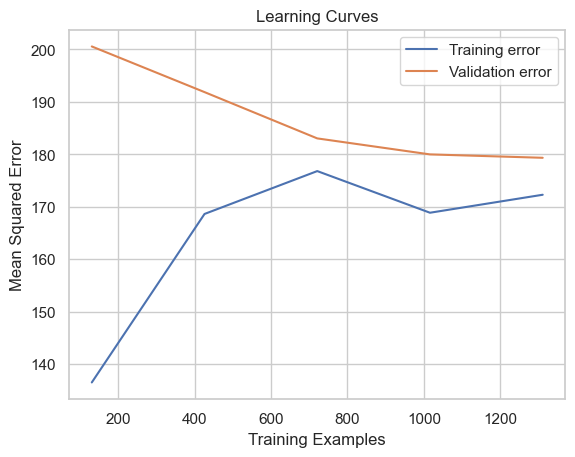

In [146]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

Lets change the penalty term __*alpha*__ for Ridge Regularization and see the Error changes that happen 

Ridge Regularization R2 score for alpha 0.0: 0.8400561031496397
MAE: 10.45889683645252
MSE: 184.02231342670464
RMSE: 13.56548242513714

Ridge Regularization R2 score for alpha 0.2: 0.8400523818434019
MAE: 10.458800426548505
MSE: 184.02659494914056
RMSE: 13.565640233661682

Ridge Regularization R2 score for alpha 0.4: 0.8400486349536865
MAE: 10.458704058161391
MSE: 184.03090590646474
RMSE: 13.565799125243775

Ridge Regularization R2 score for alpha 0.7: 0.840042966702483
MAE: 10.458559583368322
MSE: 184.03742747258946
RMSE: 13.566039491044888

Ridge Regularization R2 score for alpha 1.0: 0.8400372410230857
MAE: 10.458415201842849
MSE: 184.0440151123142
RMSE: 13.566282287801409



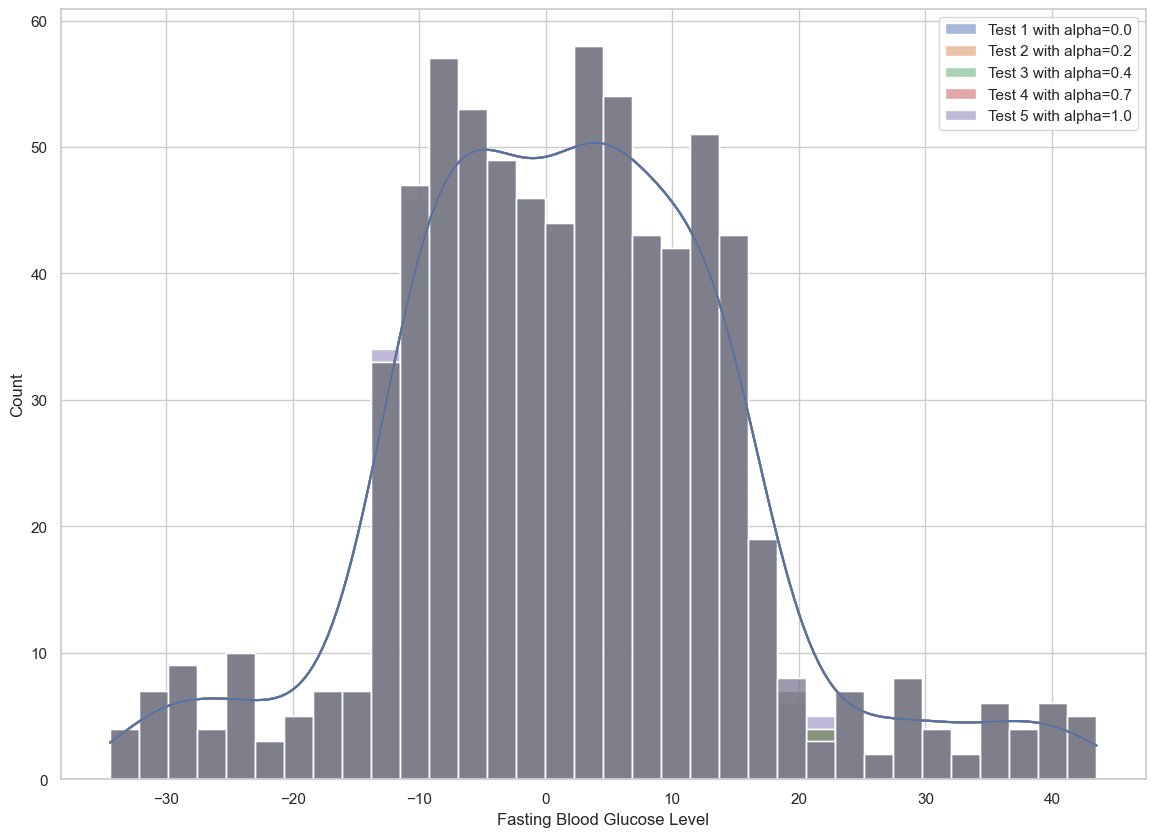

<Figure size 640x480 with 0 Axes>

In [147]:
alpha = [0.0,0.2,0.4,0.7,1.0]
ridge_dic = {}
for n,i in enumerate(alpha):
    ridge_test = Ridge(alpha=i,fit_intercept=True).fit(X_train, y_train)
    ridge_test_y_pred = ridge_test.predict(X_test)
    name = 'Test {} with alpha={}'.format(n+1,i)
    ridge_dic[name] = y_test-ridge_test_y_pred
    print('Ridge Regularization R2 score for alpha {}: {}'.format(i, ridge_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, ridge_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, ridge_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_test_y_pred)))
    print()
ridge_df = pd.DataFrame(ridge_dic)
sns.set(style="whitegrid")
plt.subplots(figsize=(14, 10))
sns.histplot(ridge_df,kde=True)
plt.xlabel('Fasting Blood Glucose Level')
plt.figure()
plt.show()

# Lasso regularization

Lasso regularization is used to avoid overfitting in regression models. It works by adding a regularization term to the loss function that penalizes the magnitude of the coefficients. This encourages the model to use only the most important features, effectively reducing the complexity of the model and preventing overfitting.

In [148]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5).fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

print('Lasso Regression R2 score:', lasso.score(X_test, y_test))
df = pd.DataFrame( data = lasso.coef_, columns = ['Coefficient'] ,index = X.columns)
df

Lasso Regression R2 score: 0.8420338798437669


Coefficient
Diabetes_012            29.980448
HighBP                   0.000000
HighChol                 0.000000
BMI                      0.000000
Smoker                   0.000000
Stroke                  -0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.037101
HvyAlcoholConsump       -0.000000
NoDocbcCost             -0.000000
GenHlth                  0.000000
MentHlth                 0.000000
PhysHlth                 0.000000
DiffWalk                 0.000000
Age                     -0.017086
Education               -0.000000
Income                  -0.000000

MAE: 10.368706605880796
MSE: 181.74679651195044
RMSE: 13.481349951393979


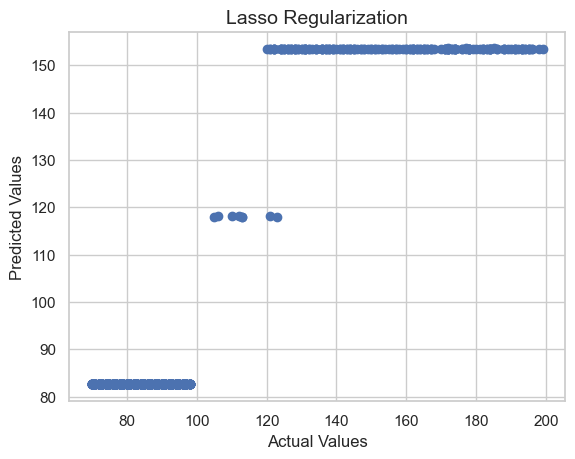

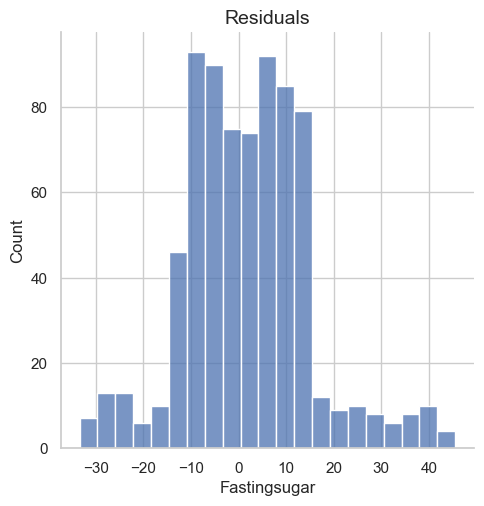

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred)))

best_model['Name'].append('Lasso Regularization')
best_model['MAE'].append(metrics.mean_absolute_error(y_test, lasso_y_pred))
best_model['MSE'].append(metrics.mean_squared_error(y_test, lasso_y_pred))
best_model['R2 score'].append(lasso.score(X_test, y_test))

plot_model(y_test,lasso_y_pred,'Lasso Regularization')
plt.show()

# Plotting Residuals
sns.displot((y_test - lasso_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

Validation curve for Lasso Regularization

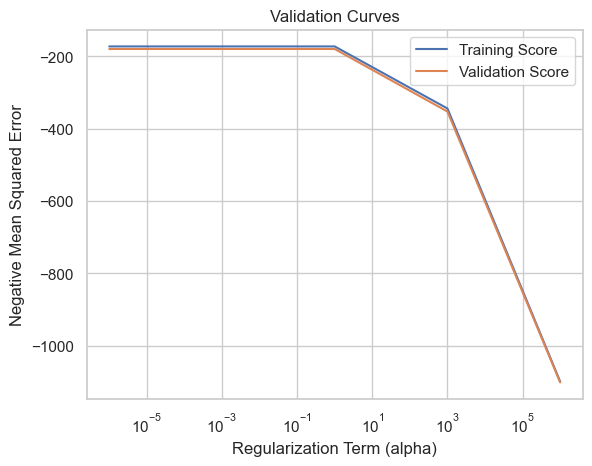

In [150]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

Learning Curve for Lasso Regularization

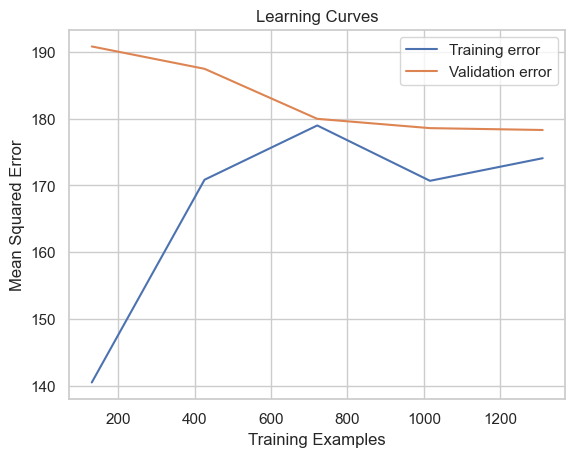

In [151]:
train_sizes, train_scores, test_scores = learning_curve(lasso, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

Lets change the penalty term alpha for Lasso Regularization and see the Error changes that happen

Lasso Regression R2 score for alpha 0.0: 0.8400561031496397
MAE: 10.458896836452523
MSE: 184.0223134267047
RMSE: 13.565482425137143

Lasso Regression R2 score for alpha 0.2: 0.8413625511621533
MAE: 10.409645421411149
MSE: 182.5191889538816
RMSE: 13.509966282485001

Lasso Regression R2 score for alpha 0.4: 0.8419869618163124
MAE: 10.380147689880998
MSE: 181.80077771488234
RMSE: 13.483351872397396

Lasso Regression R2 score for alpha 0.6: 0.8418550791065128
MAE: 10.365901590732491
MSE: 181.95251442904413
RMSE: 13.48897751607008

Lasso Regression R2 score for alpha 1.0: 0.8407875674361152
MAE: 10.366028074371588
MSE: 183.18073239212376
RMSE: 13.534427671391345



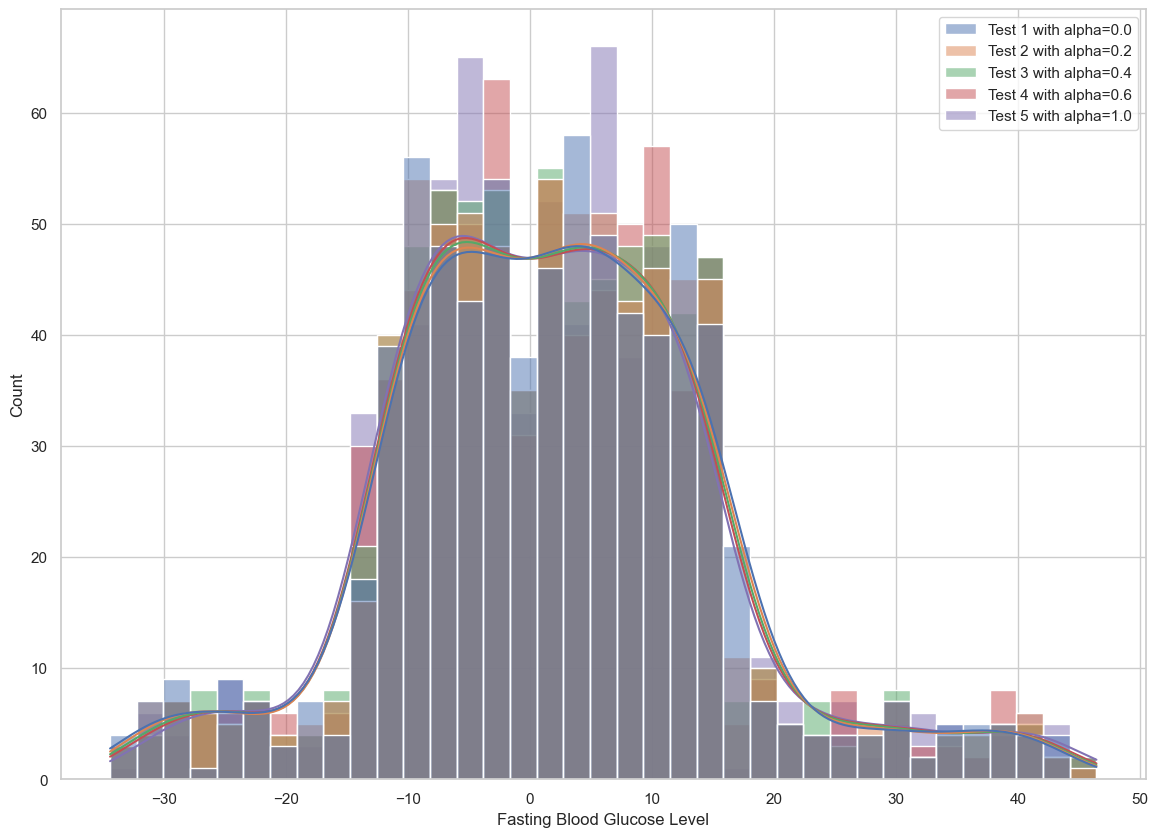

<Figure size 640x480 with 0 Axes>

In [152]:
alpha = [0.0,0.2,0.4,0.6,1.0]
lasso_dic = {}
for n,i in enumerate(alpha):
    lasso_test = Lasso(alpha=i).fit(X_train, y_train)
    lasso_test_y_pred = lasso_test.predict(X_test)
    name = 'Test {} with alpha={}'.format(n+1,i)
    lasso_dic[name] = y_test-lasso_test_y_pred
    print('Lasso Regression R2 score for alpha {}: {}'.format(i, lasso_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, lasso_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, lasso_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_test_y_pred)))
    print()
lasso_df = pd.DataFrame(lasso_dic)
sns.set(style="whitegrid")
plt.subplots(figsize=(14, 10))
sns.histplot(lasso_df,kde=True)
plt.xlabel('Fasting Blood Glucose Level')
plt.figure()
plt.show()

# Elastic Net regularization

Elastic Net regularization is a combination of Lasso and Ridge regularization methods. It provides a balance between the two regularization methods by penalizing the absolute magnitude (Lasso) as well as the squared magnitude (Ridge) of the coefficients.

In [153]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X_train, y_train)
elastic_net_y_pred = elastic_net.predict(X_test)

print('Elastic Net Regression R2 score: ', elastic_net.score(X_test, y_test))
df = pd.DataFrame( data = elastic_net.coef_, columns = ['Coefficient'] ,index = X.columns)
df

Elastic Net Regression R2 score:  0.7968704249763914


Coefficient
Diabetes_012            23.515742
HighBP                   0.556067
HighChol                 0.490853
BMI                      0.693199
Smoker                   0.000000
Stroke                   0.094662
HeartDiseaseorAttack     0.293259
PhysActivity             0.000000
HvyAlcoholConsump       -0.204147
NoDocbcCost             -0.025153
GenHlth                  0.815078
MentHlth                 0.000000
PhysHlth                 0.000000
DiffWalk                 0.388071
Age                      0.000000
Education               -0.083955
Income                  -0.193879

MAE: 10.965545262812947
MSE: 233.70928842755416
RMSE: 15.28755338265591


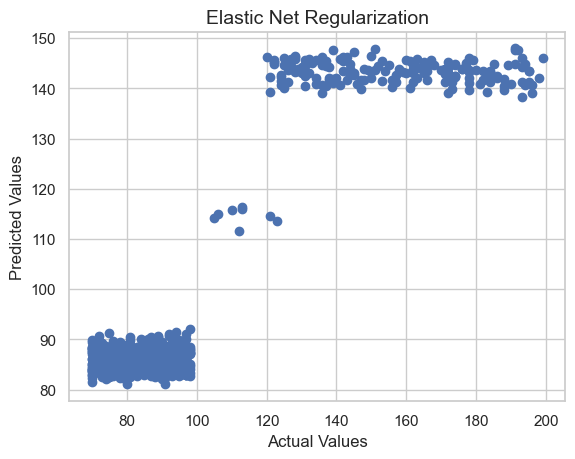

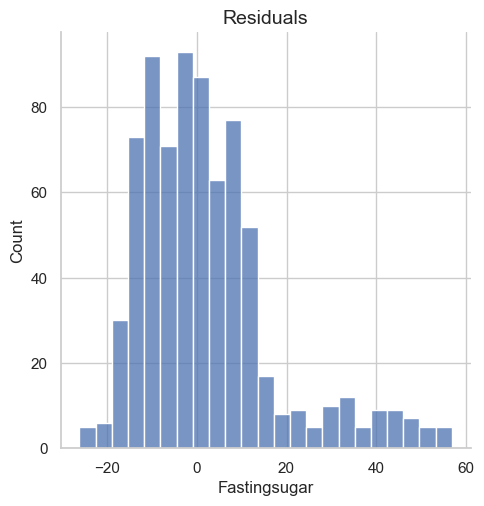

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, elastic_net_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_y_pred)))

best_model['Name'].append('Elastic Net Regularization')
best_model['MAE'].append(metrics.mean_absolute_error(y_test, elastic_net_y_pred))
best_model['MSE'].append(metrics.mean_squared_error(y_test, elastic_net_y_pred))
best_model['R2 score'].append(elastic_net.score(X_test, y_test))

plot_model(y_test,elastic_net_y_pred,'Elastic Net Regularization')
plt.show()

# Plotting Residuals
sns.displot((y_test - elastic_net_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

Validation Curve for Elastic-Net Regularization

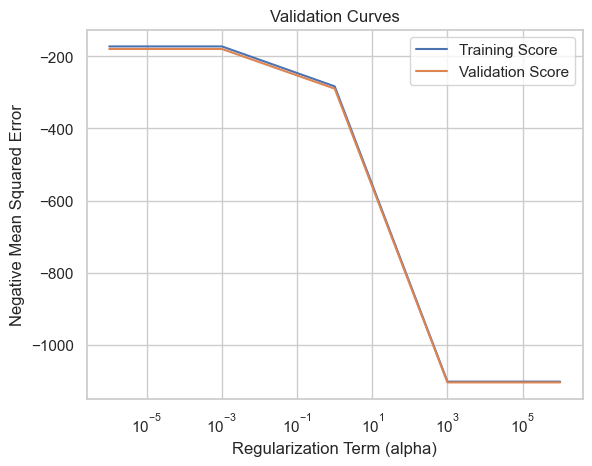

In [155]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(elastic_net, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

Learning Curve for Elastic-Net Regularization

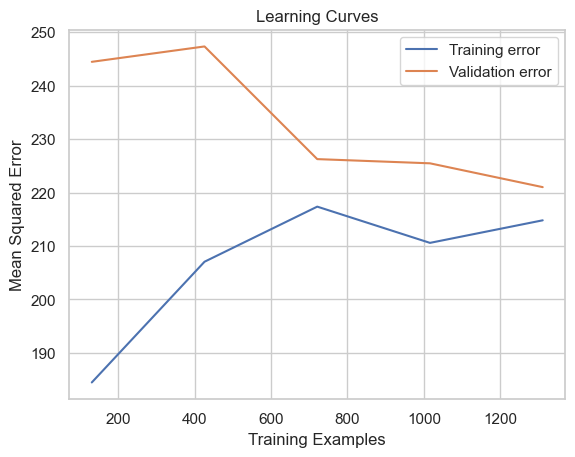

In [156]:
train_sizes, train_scores, test_scores = learning_curve(elastic_net, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

Lets change the penalty term alpha and l1_ratio for Elastic-Net Regularization and see the Error changes that happen

Elastic-Net Regularization R2 score for alpha 0.0 and L1-ratio 1.0: 0.8400561031496397
MAE: 10.458896836452523
MSE: 184.0223134267047
RMSE: 13.565482425137143

Elastic-Net Regularization R2 score for alpha 0.2 and L1-ratio 0.7: 0.8357670381492728
MAE: 10.427863152358364
MSE: 188.95706667048407
RMSE: 13.746165526083413

Elastic-Net Regularization R2 score for alpha 0.4 and L1-ratio 0.4: 0.7996990286506729
MAE: 10.925166131411288
MSE: 230.45485857959596
RMSE: 15.180739724387477

Elastic-Net Regularization R2 score for alpha 0.7 and L1-ratio 0.2: 0.7203992106046261
MAE: 12.456190120283887
MSE: 321.6927004636354
RMSE: 17.935793834219755

Elastic-Net Regularization R2 score for alpha 1.0 and L1-ratio 0.0: 0.6272643711330959
MAE: 14.280942261006338
MSE: 428.8483278909858
RMSE: 20.708653454316767



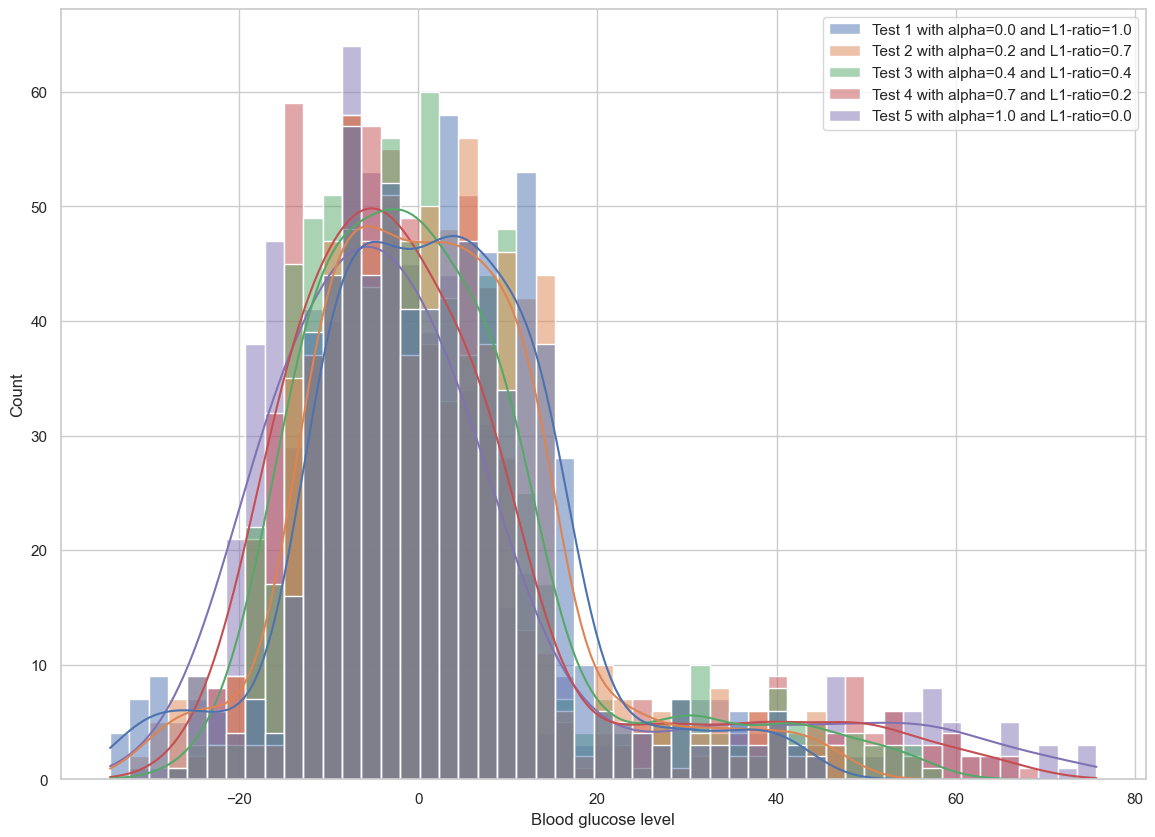

<Figure size 640x480 with 0 Axes>

In [157]:
alpha = [0.0,0.2,0.4,0.7,1.0]
l1_ratio = [1.0,0.7,0.4,0.2,0.0]
elastic_net_dic = {}
for n,i in enumerate(zip(alpha,l1_ratio)):
    elastic_net_test = elastic_net = ElasticNet(alpha=i[0], l1_ratio=i[1]).fit(X_train, y_train)
    elastic_net_test_y_pred = elastic_net_test.predict(X_test)
    name = 'Test {} with alpha={} and L1-ratio={}'.format(n+1,i[0],i[1])
    elastic_net_dic[name] = y_test-elastic_net_test_y_pred
    print('Elastic-Net Regularization R2 score for alpha {} and L1-ratio {}: {}'.format(i[0], i[1], elastic_net_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, elastic_net_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_test_y_pred)))
    print()
elastic_net_df = pd.DataFrame(elastic_net_dic)
sns.set(style="whitegrid")
plt.subplots(figsize=(14, 10))
sns.histplot(elastic_net_df,kde=True)
plt.xlabel('Blood glucose level')
plt.figure()
plt.show()

MSE and R2 score of all the models

In [158]:
df = pd.DataFrame(best_model)
df

Name         MSE        MAE   R2 score
0           Linear Regression  184.022313  10.458897  13.565482
1                         SGD  184.672557  10.491109   0.839491
2        Ridge Regularization  184.033072  10.458656  13.565879
3        Lasso Regularization  181.746797  10.368707   0.842034
4  Elastic Net Regularization  233.709288  10.965545   0.796870

From the above information we can see that Stochastic gradient descent worked well with our model giving an R2 score of 0.83.